<a href="https://colab.research.google.com/github/TheKeiser/ai-ml-principles-exercises/blob/main/ML-training/logging-trainings-with-WandB/Inlamning1_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependencies and import packages
First we need to install the libraries we will be using. We will use `numpy` for generic matrix operations and `tensorflow` for deep learning operations such as convolutions, pooling and training (backpropagation).

In [1]:
import sys
!{sys.executable} -m pip install numpy tensorflow
from IPython.display import clear_output
clear_output()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, datasets, models

!pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.6 MB/s 
     |████████████████████████████████| 182 kB 77.9 MB/s 
     |████████████████████████████████| 168 kB 60.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 168 kB 70.9 MB/s 
     |████████████████████████████████| 166 kB 77.2 MB/s 
     |████████████████████████████████| 166 kB 77.7 MB/s 
     |████████████████████████████████| 162 kB 79.0 MB/s 
     |████████████████████████████████| 162 kB 72.7 MB/s 
     |████████████████████████████████| 158 kB 81.9 MB/s 
     |████████████████████████████████| 157 kB 70.8 MB/s 
     |████████████████████████████████| 157 kB 80.9 MB/s 
     |████████████████████████████████| 157 kB 81.0 MB/s 
     |████████████████████████████████| 157 kB 45.8 MB/s 
     |████████████████████████████████| 157 kB 76.5 MB/s 
     |████████████████████████████

In [2]:
import matplotlib.pyplot as plt

## Create a neural network
Nynext we define a function that can be used to build a neural network. The neural network is a simple CNN (convolutional neural network) used for classification. The structure of the network is not important for this exercise, you can instead see it as a black box that can be trained to classify an input image.

Model 1 (same as exercise 3)

In [11]:
def create_cnn(input_shape, output_classes):
    return keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(output_classes, activation="softmax"),
        ]
    )

Model 2 

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary() #displays summary of model used

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

## Prepare the data
The neural network will be trained on a digit classification dataset called *MNIST*. This code downloads and loads the images together with their true labels. The code also does some preprocessing of the data to make it more suitable for a neural network.

For model 1 - get data and preprocess

In [23]:
def get_cifar_data(): #cifar data installed
    # Load the data and split it between train and test sets
    (image_train, label_train), (image_test, label_test) = datasets.cifar10.load_data()

    # Scale images to the [0, 1] range
    image_train = image_train.astype("float32") / 255
    image_test = image_test.astype("float32") / 255

    # Make sure images have shape (32, 32, 3)
    image_train = np.expand_dims(image_train, -1)
    image_test = np.expand_dims(image_test, -1)

    # convert class vectors to binary class matrices
    num_classes = 10
    label_train = keras.utils.to_categorical(label_train, num_classes)
    label_test = keras.utils.to_categorical(label_test, num_classes)

    return (image_train, label_train), (image_test, label_test)

In [ ]:
(image_train, label_train), (image_test, label_test) = get_cifar_data()

For model 2 - get data and preprocess

In [45]:
(image_train, label_train), (image_test, label_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
image_train, image_test = image_train / 255.0, image_test / 255.0

For using limited number of pictures in dataset

In [15]:
image_train = image_train[:500]
label_train = label_train[:500]
image_test = image_test[:500]
label_test = label_test[:500]

In [40]:
image_train.shape

(50000, 32, 32, 3)

Sample 0 is number [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


TypeError: ignored

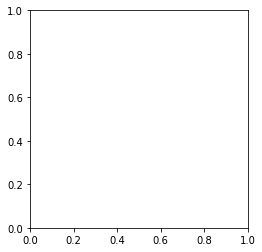

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


i = 0
print(f"Sample {i} is number {label_train[i]}")
plt.imshow(image_train[0])

image = wandb.Image(image_train[0], caption=f"Training sample {i} is a {label_train[i]}")
wandb.log({"Example training image (preprocessed)": image})

TypeError: ignored

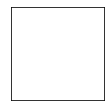

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[label_train[i][0]])
plt.show()

##Runs
Prepare model and datacollection for testrun

In [46]:
batch_size = 64
epochs = 25
wandb.init(project="ai-ml-exercise", config={"batch_size": batch_size, "epochs": epochs})

In [ ]:

cm = wandb.plot.confusion_matrix(
    y_true=ground_truth,
    preds=predictions,
    class_names=class_names)
    
wandb.log({"conf_mat": cm})

NameError: ignored

In [ ]:
wandb.log({"roc" : wandb.plot.roc_curve(ground_truth, predictions, labels=["a", "b"])})
wandb.log({"conf_mat" : wandb.plot.confusion_matrix( probs=None, y_true=ground_truth, preds=predictions, class_names=["a", "b"]})

Run model 1

In [33]:
model = create_cnn((32, 32, 3), 10)
#validation_split=0.1

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
model.fit(image_train, label_train, batch_size=batch_size,
          epochs=epochs, validation_data=(image_test, label_test),
          callbacks=[wandb.keras.WandbCallback()])
wandb.finish()

Epoch 1/30


ValueError: ignored

Run model 2

In [47]:
#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(image_train, label_train, epochs=epochs, 
          validation_data=(image_test, label_test),
          callbacks=[wandb.keras.WandbCallback()])

Epoch 1/25
1551/1563 [============================>.] - ETA: 0s - loss: 1.5528 - accuracy: 0.4341

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 10s 6ms/step - loss: 1.5505 - accuracy: 0.4351 - val_loss: 1.2881 - val_accuracy: 0.5277
Epoch 2/25
1556/1563 [============================>.] - ETA: 0s - loss: 1.2043 - accuracy: 0.5718

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 8s 5ms/step - loss: 1.2042 - accuracy: 0.5718 - val_loss: 1.2603 - val_accuracy: 0.5650
Epoch 3/25
1562/1563 [============================>.] - ETA: 0s - loss: 1.0546 - accuracy: 0.6275

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 9s 6ms/step - loss: 1.0546 - accuracy: 0.6275 - val_loss: 1.0463 - val_accuracy: 0.6245
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9550 - accuracy: 0.6623 - val_loss: 1.0480 - val_accuracy: 0.6352
Epoch 5/25
1557/1563 [============================>.] - ETA: 0s - loss: 0.8808 - accuracy: 0.6895

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 8s 5ms/step - loss: 0.8809 - accuracy: 0.6895 - val_loss: 0.9457 - val_accuracy: 0.6742
Epoch 6/25
1562/1563 [============================>.] - ETA: 0s - loss: 0.8218 - accuracy: 0.7115

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 9s 5ms/step - loss: 0.8220 - accuracy: 0.7115 - val_loss: 0.8882 - val_accuracy: 0.6935
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7762 - accuracy: 0.7259 - val_loss: 0.9256 - val_accuracy: 0.6792
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7276 - accuracy: 0.7447 - val_loss: 0.9387 - val_accuracy: 0.6729
Epoch 9/25
1555/1563 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.7566

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 8s 5ms/step - loss: 0.6903 - accuracy: 0.7567 - val_loss: 0.8826 - val_accuracy: 0.7000
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6555 - accuracy: 0.7698 - val_loss: 0.8914 - val_accuracy: 0.7062
Epoch 11/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6247 - accuracy: 0.7774 - val_loss: 0.8872 - val_accuracy: 0.7079
Epoch 12/25
1551/1563 [============================>.] - ETA: 0s - loss: 0.5911 - accuracy: 0.7931

wandb: Adding directory to artifact (/content/wandb/run-20221212_101851-3jvlcx3p/files/model-best)... Done. 0.0s


1563/1563 [==============================] - 8s 5ms/step - loss: 0.5919 - accuracy: 0.7927 - val_loss: 0.8805 - val_accuracy: 0.7087
Epoch 13/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5640 - accuracy: 0.8008 - val_loss: 0.9138 - val_accuracy: 0.7036
Epoch 14/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5356 - accuracy: 0.8080 - val_loss: 0.8903 - val_accuracy: 0.7133
Epoch 15/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5109 - accuracy: 0.8189 - val_loss: 0.9333 - val_accuracy: 0.7062
Epoch 16/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.8266 - val_loss: 0.9849 - val_accuracy: 0.7020
Epoch 17/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4600 - accuracy: 0.8378 - val_loss: 0.9900 - val_accuracy: 0.6953
Epoch 18/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4484 - accuracy: 0.8412 - val_loss: 1.0392 - val_accuracy: 0.70

## Train the network
Finally we will train the network on the data to teach it how to classify a digit. We create a model which expects a 28x28 pixel monocolor image since this is the format the images in the *MNIST* dataset are. We then create an optimizer and calls the `fit()` method to start the training.

In [43]:
wandb.finish()